<a href="https://colab.research.google.com/github/marcelocanno/Inteligencia-Artificial/blob/main/Marcelo_Fotos_Praia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* O DNA (Ácido Desoxirribonucléico) é composto por milhões de nucleotídeos ligados uns aos outros. Separadamente, nucleotídeos são bastante simples, consistindo de três partes diferentes: Base nitrogenada (Adenina, Timina, Guanina ou Citosina) Desoxirribose (um açúcar por cinco carbonos)

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('xtick', labelsize=12)

import seaborn as sns

from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import axes
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures


print('setup completo')
print('Robot Alive')
print('Marcelo Canno')

Mounted at /content/drive
setup completo
Robot Alive
Marcelo Canno


In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [ ]:
pasta = '/content/drive/MyDrive/Praia/'


positivas = os.listdir(pasta + 'positivos/')

negativas = os.listdir(pasta + 'negativos/')


In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(pasta + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(pasta + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)


label =  0
imagem


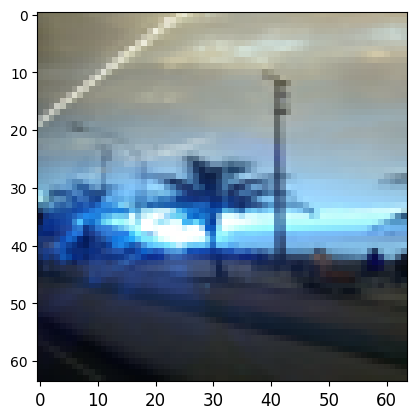

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-2])

print('imagem')
plt.imshow(dataset[-2])

label =  1
imagem


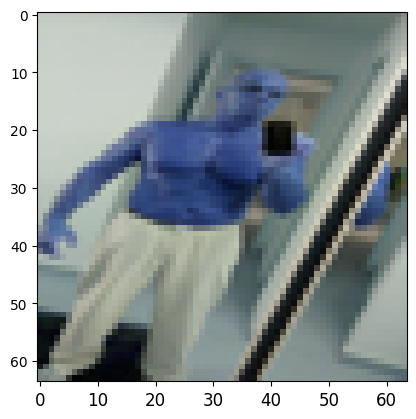

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[1])

print('imagem')
plt.imshow(dataset[1])

label =  1
imagem


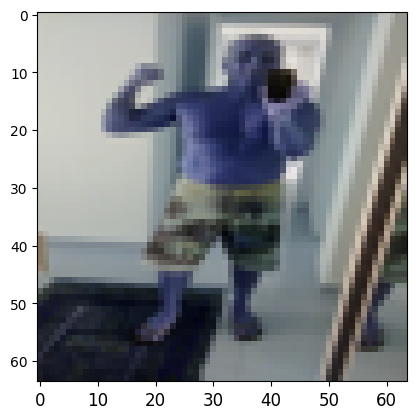

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[10])

print('imagem')
plt.imshow(dataset[10])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(51, 64, 64, 3)
(51, 2)


In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)

flat = tf.keras.layers.Flatten()(drop3)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop4  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop4)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation= 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                        

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 40, validation_split = 0.1 )

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.7129 - accuracy: 0.4889 - val_loss: 0.7016 - val_accuracy: 0.3333
Epoch 2/40
1/1 [==============================] - 0s 312ms/step - loss: 0.6913 - accuracy: 0.5778 - val_loss: 0.6446 - val_accuracy: 1.0000
Epoch 3/40
1/1 [==============================] - 0s 313ms/step - loss: 0.5928 - accuracy: 0.8222 - val_loss: 0.6121 - val_accuracy: 1.0000
Epoch 4/40
1/1 [==============================] - 0s 293ms/step - loss: 0.5450 - accuracy: 0.9333 - val_loss: 0.5489 - val_accuracy: 1.0000
Epoch 5/40
1/1 [==============================] - 0s 300ms/step - loss: 0.4061 - accuracy: 0.9556 - val_loss: 0.4472 - val_accuracy: 1.0000
Epoch 6/40
1/1 [==============================] - 0s 312ms/step - loss: 0.3823 - accuracy: 0.8889 - val_loss: 0.3562 - val_accuracy: 1.0000
Epoch 7/40
1/1 [==============================] - 0s 304ms/step - loss: 0.2621 - accuracy: 0.9333 - val_loss: 0.1963 - val_accuracy: 1.0000
Epoch 8/40
1/1 [=======

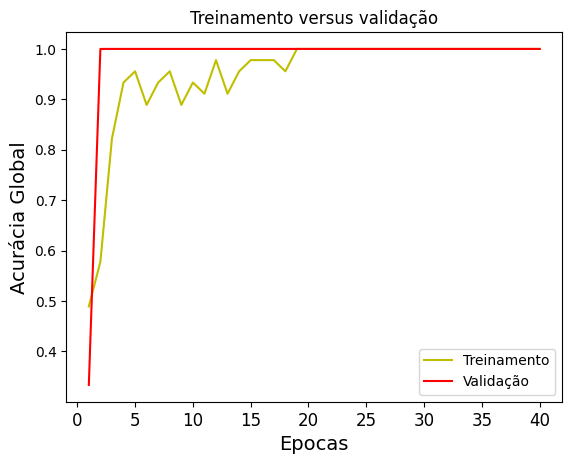

In [ ]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Acurácia Global")
plt.legend()
plt.show()

In [ ]:
model.save('praia_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('praia_model.h5')

In [ ]:
_,score = model.evaluate(X_test, y_test)

print(score)

1/1 [==============================] - 0s 67ms/step - loss: 0.2025 - accuracy: 0.8462
0.8461538553237915
